**Import relevant libraries**


In [1]:
# libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import numpy as np
from datetime import datetime

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

import warnings
warnings.filterwarnings('ignore')

## Data Extraction

We will extract data for primary stock = PepsiCo (PEP), Competitor stock = Coca-Cola (KO), and the market indexS&P 500 (GSPC) for the past 4 years.

In [2]:
end = datetime(2024, 12, 2)
start = datetime(end.year - 4, end.month, end.day)

# Define the stock tickers
primary_stock = 'PEP'  # PepsiCo
competitor_stock = 'KO'  # Coca-Cola

bench_mark_index = '^GSPC' #S&P 500

In [3]:
pep_data = yf.download(primary_stock, start, end)

pep_data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,PEP,PEP,PEP,PEP,PEP
Date,,,,,
2020-12-02,126.872543,128.907844,126.232131,127.977927,4432900
2020-12-03,127.626205,128.076815,126.362761,126.362761,4757900
2020-12-04,128.863129,128.977979,127.096065,127.113726,3592600
2020-12-07,128.439026,129.490431,127.776377,128.712919,4217300
2020-12-08,128.571564,129.137024,127.484810,128.403691,3623800


In [4]:
co_data = yf.download(competitor_stock, start, end)

co_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
2020-12-02,45.817333,45.834918,45.404088,45.632693,14913100
2020-12-03,46.406429,46.547108,45.632698,45.632698,17318900
2020-12-04,47.347221,47.364807,46.388847,46.406432,18122400
2020-12-07,46.591072,47.285671,46.336091,47.268086,16210900
2020-12-08,46.758118,47.021890,46.415214,46.547098,12485800


In [5]:
index_data = yf.download(bench_mark_index, start, end)

index_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2020-12-02,3669.010010,3670.959961,3644.840088,3653.780029,5041250000
2020-12-03,3666.719971,3682.729980,3657.169922,3668.280029,5065340000
2020-12-04,3699.120117,3699.199951,3670.939941,3670.939941,5099620000
2020-12-07,3691.959961,3697.409912,3678.879883,3694.729980,4804500000
2020-12-08,3702.250000,3708.449951,3678.830078,3683.050049,4584390000


### Create adjClose Feature from Close Column

In [6]:
# Feature Engineering Function
def add_adjclose(adjclose):
    # Adj Close
    adjclose['Adj Close'] = adjclose['Close']

# Apply the function
add_adjclose(pep_data)
add_adjclose(co_data)
add_adjclose(index_data)

In [7]:
pep_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close
Ticker,PEP,PEP,PEP,PEP,PEP,
Date,,,,,,
2020-12-02,126.872543,128.907844,126.232131,127.977927,4432900,126.872543
2020-12-03,127.626205,128.076815,126.362761,126.362761,4757900,127.626205


In [8]:
co_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close
Ticker,KO,KO,KO,KO,KO,
Date,,,,,,
2020-12-02,45.817333,45.834918,45.404088,45.632693,14913100,45.817333
2020-12-03,46.406429,46.547108,45.632698,45.632698,17318900,46.406429


In [9]:
index_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,
Date,,,,,,
2020-12-02,3669.010010,3670.959961,3644.840088,3653.780029,5041250000,3669.010010
2020-12-03,3666.719971,3682.729980,3657.169922,3668.280029,5065340000,3666.719971


## Feature Engineering
Adding features such as ,  (next day's adjusted close price), and  (binary indicator for price movement direction).

In [10]:
# Feature Engineering Function
def add_features(data):
    # Daily Return
    data['Daily Return'] = data['Adj Close'].pct_change()

    # Tomorrow's Price
    data['Tomorrow'] = data['Adj Close'].shift(-1)

    # Stock Direction (1 = Price went up, 0 = Price went down)
    data['Stock Direction'] = (data['Tomorrow'] > data['Adj Close']).astype(int)

    # Dropping the last row due to NaN in 'Tomorrow' column
    data.dropna(inplace=True)

# Apply the function
add_features(pep_data)
add_features(co_data)
add_features(index_data)


### Preview the updated data

In [11]:
pep_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close,Daily Return,Tomorrow,Stock Direction
Ticker,PEP,PEP,PEP,PEP,PEP,,,,
Date,,,,,,,,,
2020-12-03,127.626205,128.076815,126.362761,126.362761,4757900,127.626205,0.005940,128.863129,1
2020-12-04,128.863129,128.977979,127.096065,127.113726,3592600,128.863129,0.009692,128.439026,0


In [12]:
co_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close,Daily Return,Tomorrow,Stock Direction
Ticker,KO,KO,KO,KO,KO,,,,
Date,,,,,,,,,
2020-12-03,46.406429,46.547108,45.632698,45.632698,17318900,46.406429,0.012857,47.347221,1
2020-12-04,47.347221,47.364807,46.388847,46.406432,18122400,47.347221,0.020273,46.591072,0


In [13]:
index_data.head(2)

Price,Close,High,Low,Open,Volume,Adj Close,Daily Return,Tomorrow,Stock Direction
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,,,
Date,,,,,,,,,
2020-12-03,3666.719971,3682.729980,3657.169922,3668.280029,5065340000,3666.719971,-0.000624,3699.120117,1
2020-12-04,3699.120117,3699.199951,3670.939941,3670.939941,5099620000,3699.120117,0.008836,3691.959961,0


## Exploratory Data Analysis

Investigate historical trends, returns, and volatility for each stock.

### 1. Historical Trends
Visualizing the Adjusted Close prices over time.

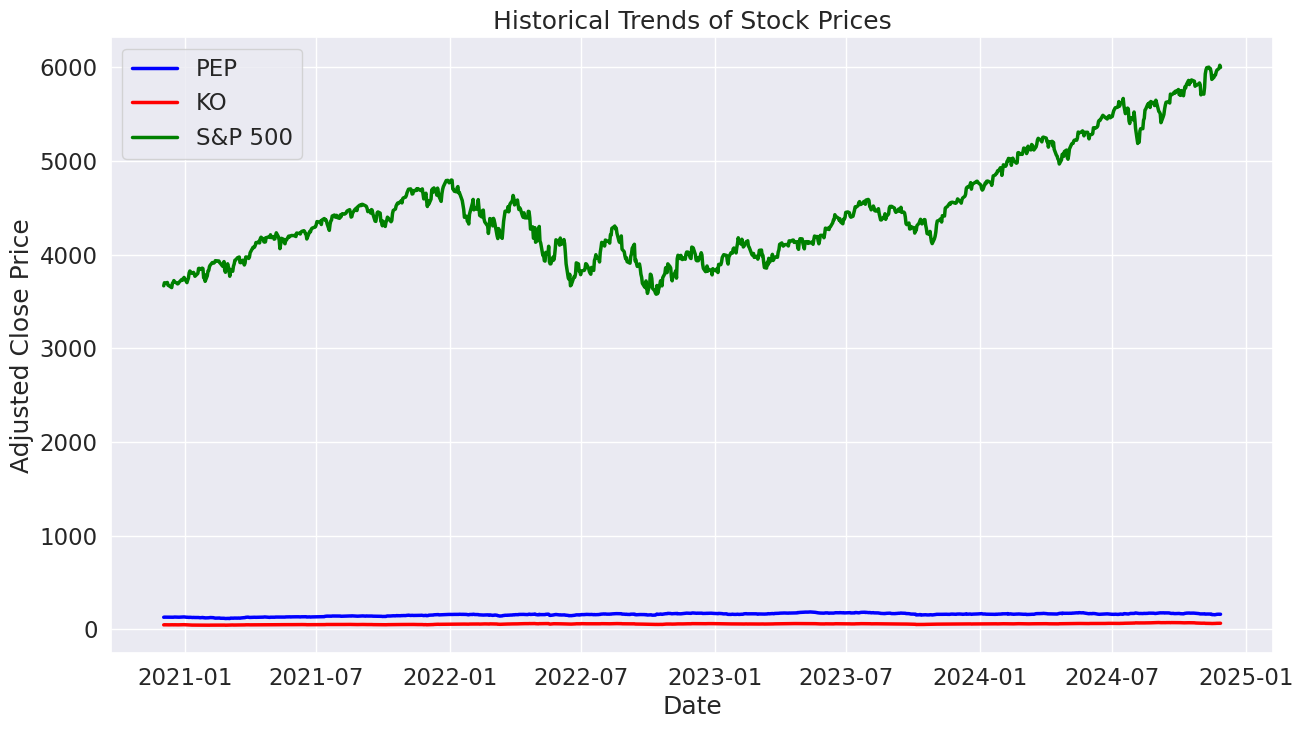

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(pep_data['Adj Close'], label='PEP', color='blue')
plt.plot(co_data['Adj Close'], label='KO', color='red')
plt.plot(index_data['Adj Close'], label='S&P 500', color='green')
plt.title('Historical Trends of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
#plt.grid(True)
plt.show()

#### Cumulative Returns:

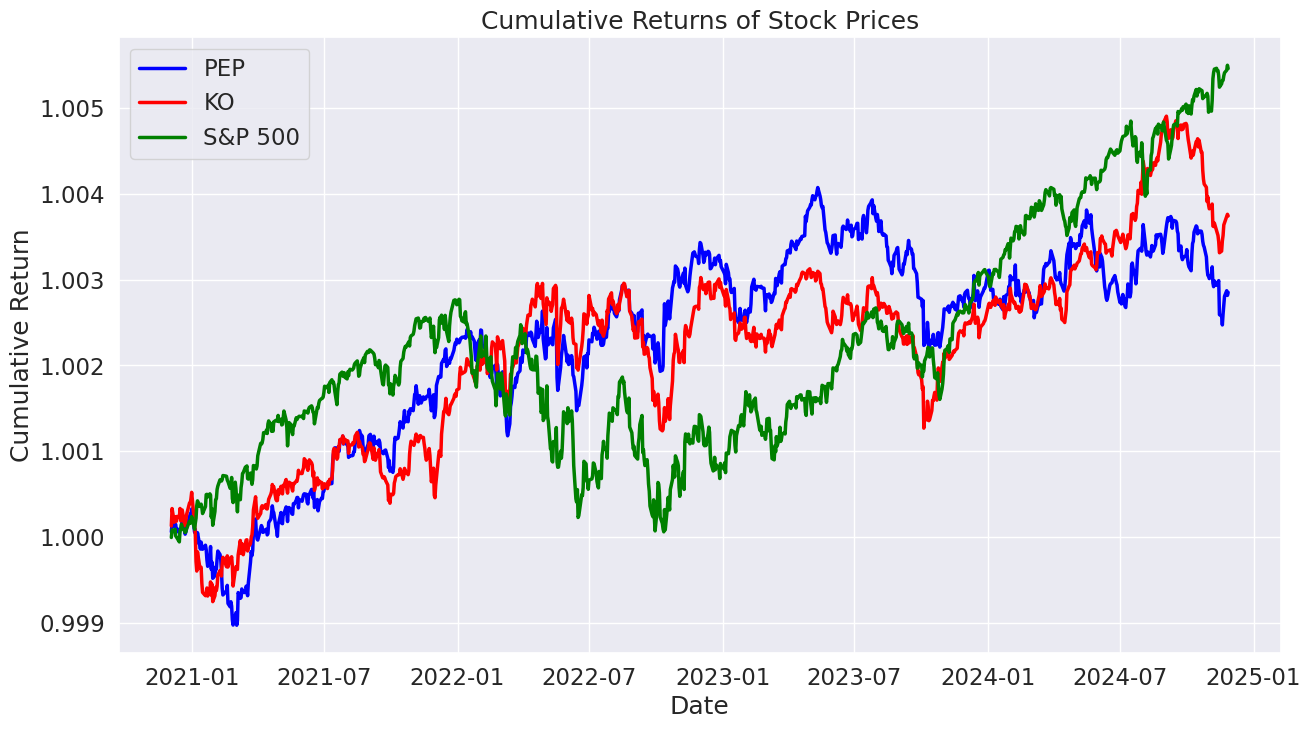

In [15]:
pep_data['Cumulative Return'] = (1 + pep_data['Daily Return'] / 100).cumprod()
co_data['Cumulative Return'] = (1 + co_data['Daily Return'] / 100).cumprod()
index_data['Cumulative Return'] = (1 + index_data['Daily Return'] / 100).cumprod()

plt.figure(figsize=(15, 8))
plt.plot(pep_data['Cumulative Return'], label='PEP', color='blue')
plt.plot(co_data['Cumulative Return'], label='KO', color='red')
plt.plot(index_data['Cumulative Return'], label='S&P 500', color='green')

plt.title('Cumulative Returns of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


### Volatility Analysis
Analyzing the distributions of daily returns.

In [16]:
pep_volatility = pep_data['Daily Return'].std()
co_volatility = co_data['Daily Return'].std()
index_volatility = index_data['Daily Return'].std()

print(f"Volatility of PEP: {pep_volatility}")
print(f"Volatility of KO: {co_volatility}")
print(f"Volatility of S&P 500: {index_volatility}")


Volatility of PEP: 0.010343183680372799
Volatility of KO: 0.00978935278194749
Volatility of S&P 500: 0.010347782133756542


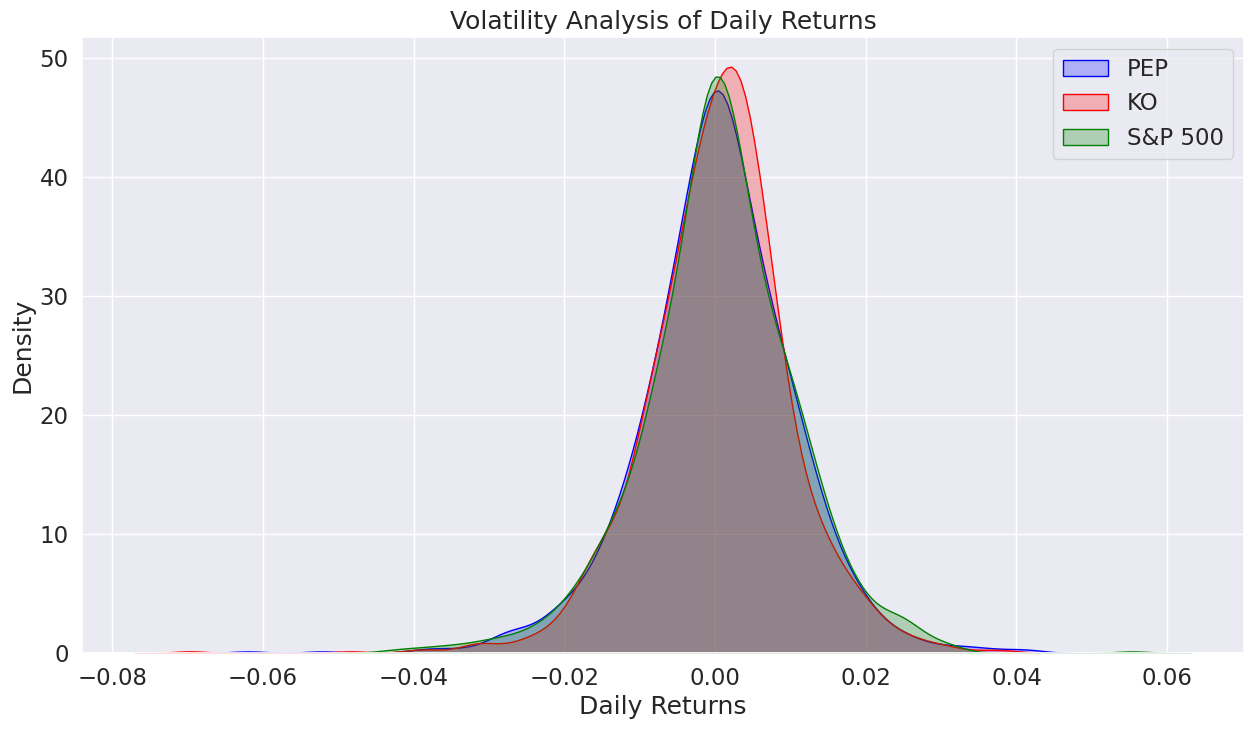

In [17]:
plt.figure(figsize=(15, 8))

sns.kdeplot(pep_data['Daily Return'].dropna(), label='PEP', fill=True, color='blue')
sns.kdeplot(co_data['Daily Return'].dropna(), label='KO', fill=True, color='red')
sns.kdeplot(index_data['Daily Return'].dropna(), label='S&P 500', fill=True, color='green')

plt.title('Volatility Analysis of Daily Returns')
plt.xlabel('Daily Returns')
plt.legend()
# plt.grid(True)
plt.show()

KDE plots provide a smooth curve that makes it easier to identify the concentration and spread of returns. A wider curve means more volatility (more extreme returns), while a narrower curve suggests less volatility

A narrower distribution (concentrated around zero) suggests lower volatility.

A wider distribution indicates higher volatility.

## 2. Dynamic Visualizations

Showcase pricing trends and highlight sector impacts.

### Dynamic Pricing Trends
Visualizing trends with overlapping time series.

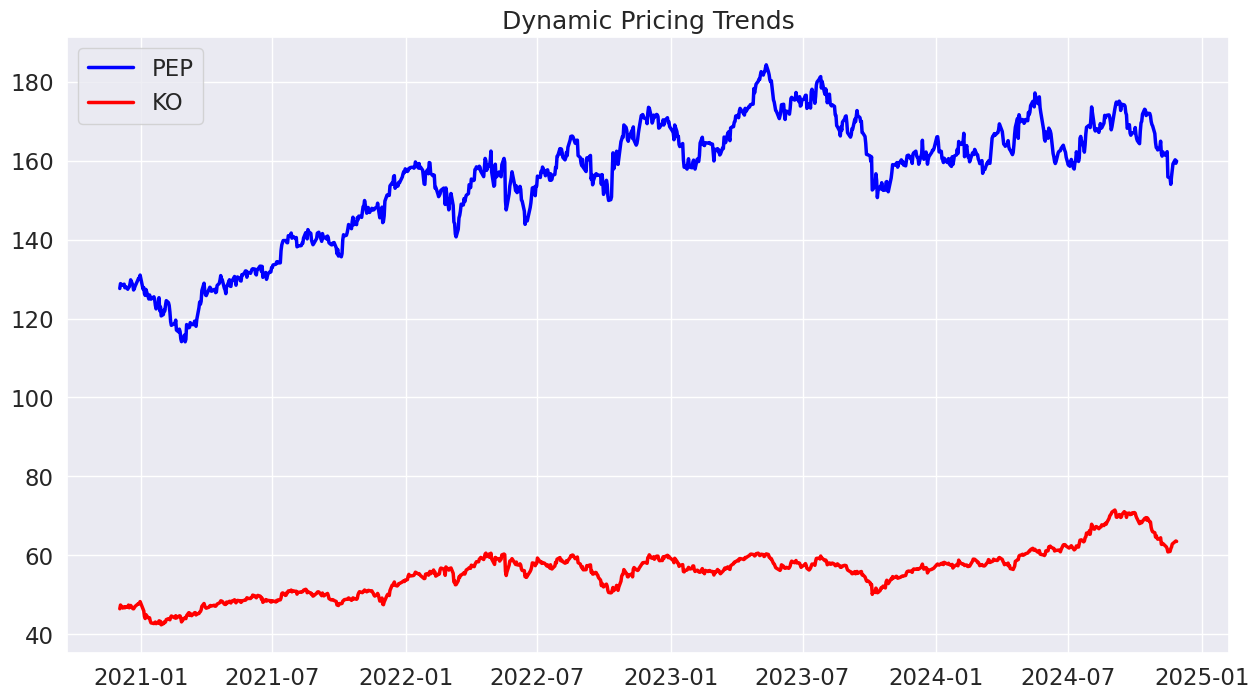

In [18]:
plt.figure(figsize=(15, 8))
plt.plot(pep_data['Adj Close'], label='PEP', color='blue')
plt.plot(co_data['Adj Close'], label='KO', color='red')
plt.title('Dynamic Pricing Trends')
plt.legend()
#plt.grid(True)
plt.show()

## 3. Comparative Analysis
### Correlation Analysis:
Evaluate relationships between each stock and the benchmark index.

In [19]:
primary_vs_benchmark_corr = pep_data['Adj Close'].corr(index_data['Adj Close'])
competitor_vs_benchmark_corr = co_data['Adj Close'].corr(index_data['Adj Close'])

print(f"Correlation Between PEP and S&P 500: {primary_vs_benchmark_corr}")
print(f"Correlation Between KO and S&P 500: {competitor_vs_benchmark_corr}")

Correlation Between PEP and S&P 500: 0.3803310133494318
Correlation Between KO and S&P 500: 0.643682094244759


In [20]:
# Calculated correlation values
correlations = pd.DataFrame({
    'Stock': ['PEP', 'KO'],
    'Correlation with S&P 500': [
        pep_data['Adj Close'].corr(index_data['Adj Close']),
        co_data['Adj Close'].corr(index_data['Adj Close'])
    ]
})

# Create a bar plot
fig_corr = px.bar(
    correlations,
    x='Stock',
    y='Correlation with S&P 500',
    title='Correlation with S&P 500',
    text='Correlation with S&P 500',
    labels={'Correlation with S&P 500': 'Correlation Coefficient'}
)
fig_corr.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_corr.show()

PEP has a moderate positive correlation, meaning PEP moves somewhat with the market but also has independent movements.

Ko has a stronger positive correlation, meaning KO tends to follow the movements of the S&P 500 more closely than PEP. It is more likely to be affected by market-wide events. If the market performs well, KO could benefit more than PEP But if the market crashes, KO might suffer more compared to PEP.

Since PEP has a lower correlation with the market, it could be a better hedge against broader market downturns compared to KO. If an investor wants stability and lower dependency on the S&P 500, PEP might be a better choice.


### 4. Comparative Volatility Analysis:
Compute the standard deviation of daily returns to assess risk levels.

In [21]:
primary_volatility = pep_data['Daily Return'].std()
competitor_volatility = co_data['Daily Return'].std()
benchmark_volatility = index_data['Daily Return'].std()

print(f"PEP Daily Return Volatility: {primary_volatility}")
print(f"KO Daily Return Volatility: {competitor_volatility}")
print(f"S&P 500 Daily Return Volatility: {benchmark_volatility}")

PEP Daily Return Volatility: 0.010343183680372799
KO Daily Return Volatility: 0.00978935278194749
S&P 500 Daily Return Volatility: 0.010347782133756542


In [22]:
# Calculated volatility values
volatility = pd.DataFrame({
    'Stock': ['PEP', 'KO', 'S&P 500'],
    'Volatility': [
        pep_data['Daily Return'].std(),
        co_data['Daily Return'].std(),
        index_data['Daily Return'].std()
    ]
})

# Create a bar plot
fig_volatility = px.bar(
    volatility,
    x='Stock',
    y='Volatility',
    title='Daily Return Volatility',
    text='Volatility',
    labels={'Volatility': 'Standard Deviation'}
)
fig_volatility.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig_volatility.show()

PepsiCo’s daily returns fluctuate a little more than Coca-Cola’s. This means PEP has a slightly higher risk in terms of daily price movements.

KO has the lowest daily return volatility of the three, meaning it tends to experience smaller price swings compared to PEP and the S&P 500. This could make KO a more stable stock, which might appeal to risk-averse investors.

Since PEP’s volatility (1.03%) is almost the same as the S&P 500’s, it means PEP moves with the overall market in terms of risk. KO, on the other hand, has lower volatility than both, making it a relatively safer bet in the short term.

If they are willing to take on more risk for potential higher returns, PEP might be the better choice.

In [23]:
# Compute average returns
volatility_returns = pd.DataFrame({
    'Stock': ['PEP', 'KO', 'S&P 500'],
    'Volatility': [
        pep_data['Daily Return'].std(),
        co_data['Daily Return'].std(),
        index_data['Daily Return'].std()
    ],
    'Avg Return': [
        pep_data['Daily Return'].mean(),
        co_data['Daily Return'].mean(),
        index_data['Daily Return'].mean()
    ]
})

# Create a scatter plot
fig_vol_returns = px.scatter(
    volatility_returns,
    x='Volatility',
    y='Avg Return',
    color='Stock',
    size='Volatility',
    hover_name='Stock',
    title='Volatility vs. Average Daily Return',
    labels={'Volatility': 'Volatility (Standard Deviation)', 'Avg Return': 'Average Return'}
)
fig_vol_returns.show()

The S&P 500 has both high returns and moderate volatility, making it a better investment option than PEP or KO in terms of risk-adjusted returns.

KO seems safer due to lower volatility, but its lower return might not be appealing to aggressive investors.

##### Risk-adjusted returns (Sharpe Ratio) to see which stock gives better returns for the risk taken

In [24]:
# Assume risk-free rate (R_f) is 0 for simplicity
risk_free_rate = 0

# Compute average daily returns
pep_avg_return = pep_data['Daily Return'].mean()
ko_avg_return = co_data['Daily Return'].mean()

# Compute standard deviation of daily returns (volatility)
pep_volatility = pep_data['Daily Return'].std()
ko_volatility = co_data['Daily Return'].std()

# Compute Sharpe Ratios
pep_sharpe_ratio = (pep_avg_return - risk_free_rate) / pep_volatility
ko_sharpe_ratio = (ko_avg_return - risk_free_rate) / ko_volatility

# Print Results
print(f"PEP Sharpe Ratio: {pep_sharpe_ratio:.2f}")
print(f"KO Sharpe Ratio: {ko_sharpe_ratio:.2f}")

# Visualize the Sharpe Ratios
sharpe_ratios = pd.DataFrame({
    'Stock': ['PEP', 'KO'],
    'Sharpe Ratio': [pep_sharpe_ratio, ko_sharpe_ratio]
})

fig_sharpe = px.bar(
    sharpe_ratios,
    x='Stock',
    y='Sharpe Ratio',
    title='Sharpe Ratio Comparison (Risk-Adjusted Returns)',
    text='Sharpe Ratio',
    labels={'Sharpe Ratio': 'Sharpe Ratio'}
)

fig_sharpe.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_sharpe.show()


PEP Sharpe Ratio: 0.03
KO Sharpe Ratio: 0.04


Both stocks have low Sharpe Ratios, suggesting relatively low risk-adjusted returns.

KO outperforms PEP when adjusting for risk, meaning it might be a better option for investors looking for a balance of returns vs. volatility.

In [25]:
# Compute S&P 500 average daily return and volatility
sp500_avg_return = index_data['Daily Return'].mean()
sp500_volatility = index_data['Daily Return'].std()

# Compute Sharpe Ratio for S&P 500
sp500_sharpe_ratio = (sp500_avg_return - risk_free_rate) / sp500_volatility

# Print Results
print(f"S&P 500 Sharpe Ratio: {sp500_sharpe_ratio:.2f}")

# Visualize all three Sharpe Ratios
sharpe_ratios = pd.DataFrame({
    'Stock': ['PEP', 'KO', 'S&P 500'],
    'Sharpe Ratio': [pep_sharpe_ratio, ko_sharpe_ratio, sp500_sharpe_ratio]
})

fig_sharpe = px.bar(
    sharpe_ratios,
    x='Stock',
    y='Sharpe Ratio',
    title='Sharpe Ratio Comparison (PEP vs KO vs S&P 500)',
    text='Sharpe Ratio',
    labels={'Sharpe Ratio': 'Sharpe Ratio'}
)

fig_sharpe.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig_sharpe.show()


S&P 500 Sharpe Ratio: 0.05


S&P 500 has the highest Sharpe Ratio (0.05), meaning the market provides better risk-adjusted returns than both individual stocks.

KO (0.04) outperforms PEP (0.03) in risk-adjusted performance, but both are inferior to the market.

Instead of investing in PEP or KO individually, an investor might be better off investing in the S&P 500 for superior risk-adjusted returns.

### Key insights

-  Performance vs. Risk Trade-Off

S&P 500 has the highest average return but also the highest volatility, meaning it offers great returns but comes with significant risk.

KO has the next highest average return with lower volatility, making it a more stable choice.

PEP has high volatility but a low average return, which is not ideal because it suggests more risk without enough reward.

*Implication:*  KO is a better-performing stock compared to PEP, while the S&P 500 provides the highest returns but requires higher risk tolerance.


- Market Sensitivity (Correlation with S&P 500)

KO (0.64 correlation) moves more closely with the S&P 500, meaning it follows overall market trends more consistently.

PEP (0.38 correlation) moves more independently, meaning its price swings are more influenced by company-specific factors rather than the overall market.

*Implication:*

KO is a better choice for those who want a stock that aligns with broader market trends.


#### Final Takeaway – Investment Decision Perspective
Best for Growth: S&P 500 (highest average return, but also high volatility).

Best for Stability: KO (steady returns, lower volatility, and moves with the market).

Most Uncertain/Risky: PEP (high volatility but low average returns, meaning risk is not well compensated).

#### If you were building a portfolio:
✅ S&P 500 → Best for long-term growth (if you can tolerate volatility).

✅ KO → Good for steady returns with less risk.

✅ PEP → Might need further investigation since it’s volatile but not offering strong returns.

In [26]:
# Add daily returns to a single DataFrame for visualization
pep_data['Type'] = 'PEP'
co_data['Type'] = 'KO'
index_data['Type'] = 'S&P 500'

# Reset index to make 'Date' a column
pep_data = pep_data.reset_index()
co_data = co_data.reset_index()
index_data = index_data.reset_index()

daily_returns = pd.concat([pep_data[['Date', 'Daily Return', 'Type']],
                           co_data[['Date', 'Daily Return', 'Type']],
                           index_data[['Date', 'Daily Return', 'Type']]])

In [27]:
print(type(daily_returns.columns))
print(daily_returns.columns)

<class 'pandas.core.indexes.multi.MultiIndex'>
MultiIndex([(        'Date', ''),
            ('Daily Return', ''),
            (        'Type', '')],
           names=['Price', 'Ticker'])


In [28]:
daily_returns.columns = ['Date', 'Daily Return', 'Type']  # Flatten MultiIndex

In [29]:
# Create an interactive line plot
fig_returns = px.line(
    daily_returns,
    x='Date',
    y='Daily Return',
    color='Type',
    title='Daily Return Trends Over Time',
    labels={'Daily Return': 'Daily Return', 'Date': 'Date'}
)
fig_returns.show()

### Machine Learning

### Further Feature engineering

In [30]:
import pandas as pd

In [31]:
# Function to compute technical indicators
def add_technical_indicators(data):
    # 1️⃣ Simple Moving Average (SMA)
    data['SMA_10'] = data['Adj Close'].rolling(window=10).mean()

    # 2️⃣ Exponential Moving Average (EMA)
    data['EMA_10'] = data['Adj Close'].ewm(span=10, adjust=False).mean()

    # 3️⃣ Relative Strength Index (RSI)
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # 4️⃣ Moving Average Convergence Divergence (MACD)
    short_ema = data['Adj Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Adj Close'].ewm(span=26, adjust=False).mean()
    data['MACD'] = short_ema - long_ema
    data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

    # 5️⃣ Bollinger Bands (Upper & Lower Bands)
    data['Middle_Band'] = data['Adj Close'].rolling(window=20).mean()
    data['Std_Dev'] = data['Adj Close'].rolling(window=20).std()
    data['Upper_Band'] = data['Middle_Band'] + (2 * data['Std_Dev'])
    data['Lower_Band'] = data['Middle_Band'] - (2 * data['Std_Dev'])

    # Drop any NaN values introduced
    data.dropna(inplace=True)

# Apply the function to all datasets
for df in [pep_data, co_data, index_data]:
    add_technical_indicators(df)

# Check the updated dataset
print(pep_data.head())  # Check if new features are added


Price        Date       Close        High         Low        Open   Volume  \
Ticker                    PEP         PEP         PEP         PEP      PEP   
19     2020-12-31  131.027786  131.169155  129.561120  130.303284  2076800   
20     2021-01-04  127.467133  130.568324  125.408502  129.888001  7486900   
21     2021-01-05  127.847084  128.271176  126.256724  127.290468  4126000   
22     2021-01-06  126.283218  126.875197  125.099289  125.169973  4843300   
23     2021-01-07  125.876808  126.477603  124.710539  126.177206  4473200   

Price    Adj Close Daily Return    Tomorrow Stock Direction  ... Type  \
Ticker                                                       ...        
19      131.027786     0.006720  127.467133               0  ...  PEP   
20      127.467133    -0.027175  127.847084               1  ...  PEP   
21      127.847084     0.002981  126.283218               0  ...  PEP   
22      126.283218    -0.012232  125.876808               0  ...  PEP   
23      125.876

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Selecting features
def prepare_features(data):
    return data.loc[:, [
        ('Adj Close', ''), ('Daily Return', ''), ('SMA_10', ''),
        ('EMA_10', ''), ('Std_Dev', ''), ('Upper_Band', ''), ('Lower_Band', '')
    ]]

# Prepare features for all datasets
X_pep = prepare_features(pep_data)
X_ko = prepare_features(co_data)

# Target variable (Stock Direction)
y_pep = pep_data['Stock Direction']
y_ko = co_data['Stock Direction']

In [33]:
# Train-test split (80:20)
X_train_pep, X_test_pep, y_train_pep, y_test_pep = train_test_split(X_pep, y_pep, test_size=0.2, random_state=42, stratify=y_pep)
X_train_ko, X_test_ko, y_train_ko, y_test_ko = train_test_split(X_ko, y_ko, test_size=0.2, random_state=42, stratify=y_ko)


In [34]:
# Normalize features using MinMaxScaler (needed for LSTM)
scaler = MinMaxScaler()
X_train_pep = scaler.fit_transform(X_train_pep)
X_test_pep = scaler.transform(X_test_pep)

X_train_ko = scaler.fit_transform(X_train_ko)
X_test_ko = scaler.transform(X_test_ko)

In [35]:
from xgboost import XGBClassifier

# Create an XGBoost classifier object
model_pep = XGBClassifier()
model_ko = XGBClassifier()

In [36]:
# Fit the model to your training data for PEP
model_pep.fit(X_train_pep, y_train_pep)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
# Fit the model to your training data for PEP
model_ko.fit(X_train_ko, y_train_ko)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred_pep = model_pep.predict(X_test_pep)

# Evaluate the model (e.g., using accuracy)
accuracy_pep = accuracy_score(y_test_pep, y_pred_pep)
print(f"Accuracy for PEP: {accuracy_pep:.4f}")

Accuracy for PEP: 0.4670


In [39]:
# Make predictions on the test set
y_pred_ko = model_ko.predict(X_test_ko)

# Evaluate the model (e.g., using accuracy)
accuracy_ko = accuracy_score(y_test_ko, y_pred_ko)
print(f"Accuracy for KO: {accuracy_ko:.4f}")

Accuracy for KO: 0.4670


In [40]:
print(classification_report(y_test_pep, y_pred_pep))

              precision    recall  f1-score   support

           0       0.44      0.45      0.44        94
           1       0.49      0.49      0.49       103

    accuracy                           0.47       197
   macro avg       0.47      0.47      0.47       197
weighted avg       0.47      0.47      0.47       197



In [41]:
print(classification_report(y_test_ko, y_pred_ko))

              precision    recall  f1-score   support

           0       0.41      0.33      0.36        91
           1       0.50      0.58      0.54       106

    accuracy                           0.47       197
   macro avg       0.45      0.46      0.45       197
weighted avg       0.46      0.47      0.46       197



In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [43]:
# Assuming you want to use X_train_pep for the LSTM model:
X_train_lstm_pep = X_train_pep.reshape(X_train_pep.shape[0], X_train_pep.shape[1], 1)
X_train_lstm_ko = X_train_ko.reshape(X_train_ko.shape[0], X_train_ko.shape[1], 1)


# Model for PEP
lstm_model_pep = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm_pep.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1, activation='sigmoid')
])

# Model for KO
lstm_model_ko = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm_ko.shape[1], 1)), # Using KO's shape here
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
     Dense(1, activation='sigmoid')
])

In [44]:
# Compile the models
lstm_model_pep.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile lstm_model_pep
lstm_model_ko.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile lstm_model_ko

In [45]:
lstm_model_pep.fit(X_train_lstm_pep, y_train_pep, epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.5197 - loss: 0.6935
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5232 - loss: 0.6917
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5549 - loss: 0.6905
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5147 - loss: 0.6924
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5269 - loss: 0.6927
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5117 - loss: 0.6947
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5222 - loss: 0.6928
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5203 - loss: 0.6924
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5055 - loss: 0.6935
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5222 - loss: 0.6921
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5152 - loss: 0.6923
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste

In [46]:
lstm_model_ko.fit(X_train_lstm_ko, y_train_ko, epochs=100, batch_size=32)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5326 - loss: 0.6925
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5333 - loss: 0.6919
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5045 - loss: 0.6962
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5372 - loss: 0.6908
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5402 - loss: 0.6904
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5419 - loss: 0.6903
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5419 - loss: 0.6897
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5407 - loss: 0.6904
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5287 - loss: 0.6917
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5349 - loss: 0.6912
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5414 - loss: 0.6895
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

In [47]:
loss_pep, accuracy_pep = lstm_model_pep.evaluate(X_test_pep, y_test_pep)
print(f"Loss (PEP): {loss_pep}, Accuracy (PEP): {accuracy_pep}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5650 - loss: 0.6874  
Loss (PEP): 0.688988208770752, Accuracy (PEP): 0.5583756566047668


In [48]:
loss_ko, accuracy_ko = lstm_model_ko.evaluate(X_test_ko, y_test_ko)
print(f"Loss (KO): {loss_ko}, Accuracy (KO): {accuracy_ko}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5261 - loss: 0.6918  
Loss (KO): 0.6899387240409851, Accuracy (KO): 0.5380710363388062


In [49]:
!pip install keras-tuner --quiet

In [50]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define model-building function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32),
                   return_sequences=True, input_shape=(X_train_lstm_pep.shape[1], 1)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  metrics=['accuracy'])
    return model

# Hyperparameter tuning for PEP
tuner_pep = kt.Hyperband(build_model,
                         objective='val_accuracy',
                         max_epochs=50,  # Increased max_epochs
                         factor=3,
                         directory='my_dir',
                         project_name='pep_tuning')

Reloading Tuner from my_dir/pep_tuning/tuner0.json


In [51]:
# Apply early stopping & model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_pep.h5', save_best_only=True)

In [52]:
# Run hyperparameter tuning for PEP
tuner_pep.search(X_train_lstm_pep, y_train_pep, epochs=50, validation_split=0.2,
                 callbacks=[early_stopping, checkpoint])

In [53]:
# Print best hyperparameters
tuner_pep.results_summary()


Results summary
Results in my_dir/pep_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0011 summary
Hyperparameters:
units: 64
dropout: 0.4
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.5316455960273743

Trial 0017 summary
Hyperparameters:
units: 64
dropout: 0.30000000000000004
optimizer: adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.5253164768218994

Trial 0012 summary
Hyperparameters:
units: 64
dropout: 0.30000000000000004
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.5253164768218994

Trial 0000 summary
Hyperparameters:
units: 96
dropout: 0.4
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.5253164768218994

Trial 0015 summary
Hyperparameters:
units: 64
dropout: 0.2
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
S

In [54]:
# Get best model for PEP
best_hps_pep = tuner_pep.get_best_hyperparameters(num_trials=1)[0]
model_pep = tuner_pep.hypermodel.build(best_hps_pep)


In [55]:
# Train final model
X_test_lstm_pep = X_test_pep.reshape(X_test_pep.shape[0], X_test_pep.shape[1], 1) # Reshape X_test_pep to have the correct shape for LSTM input
model_pep.fit(X_train_lstm_pep, y_train_pep, epochs=100, batch_size=32,
              validation_data=(X_test_lstm_pep, y_test_pep), # Use X_test_lstm_pep here
              callbacks=[early_stopping, checkpoint])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4854 - loss: 0.6938

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.4865 - loss: 0.6938 - val_accuracy: 0.5228 - val_loss: 0.6928
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5245 - loss: 0.6922 - val_accuracy: 0.5228 - val_loss: 0.6929
Epoch 3/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5248 - loss: 0.6892

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5242 - loss: 0.6894 - val_accuracy: 0.5228 - val_loss: 0.6927
Epoch 4/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4908 - loss: 0.6938

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4920 - loss: 0.6938 - val_accuracy: 0.5228 - val_loss: 0.6925
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5570 - loss: 0.6897 - val_accuracy: 0.5228 - val_loss: 0.6926
Epoch 6/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5314 - loss: 0.6918

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5302 - loss: 0.6918 - val_accuracy: 0.5228 - val_loss: 0.6923
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5502 - loss: 0.6920

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5493 - loss: 0.6920 - val_accuracy: 0.5228 - val_loss: 0.6922
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5195 - loss: 0.6899

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5192 - loss: 0.6900 - val_accuracy: 0.5228 - val_loss: 0.6921
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4935 - loss: 0.6951 - val_accuracy: 0.5228 - val_loss: 0.6922
Epoch 10/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5120 - loss: 0.6918

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5125 - loss: 0.6918 - val_accuracy: 0.5228 - val_loss: 0.6919
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5308 - loss: 0.6898 - val_accuracy: 0.5228 - val_loss: 0.6930
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5328 - loss: 0.6928

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5325 - loss: 0.6928 - val_accuracy: 0.5228 - val_loss: 0.6919
Epoch 13/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5018 - loss: 0.6938

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5019 - loss: 0.6937 - val_accuracy: 0.5228 - val_loss: 0.6918
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5163 - loss: 0.6963 - val_accuracy: 0.5228 - val_loss: 0.6918
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5401 - loss: 0.6884 - val_accuracy: 0.5279 - val_loss: 0.6920
Epoch 16/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4826 - loss: 0.6931

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4845 - loss: 0.6931 - val_accuracy: 0.5228 - val_loss: 0.6917
Epoch 17/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5173 - loss: 0.6924 - val_accuracy: 0.5228 - val_loss: 0.6920
Epoch 18/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5216 - loss: 0.6935 - val_accuracy: 0.5228 - val_loss: 0.6917
Epoch 19/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4882 - loss: 0.6950

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4919 - loss: 0.6946 - val_accuracy: 0.5228 - val_loss: 0.6913
Epoch 20/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5461 - loss: 0.6902

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5429 - loss: 0.6907 - val_accuracy: 0.5228 - val_loss: 0.6912
Epoch 21/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5366 - loss: 0.6909 - val_accuracy: 0.5228 - val_loss: 0.6913
Epoch 22/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5495 - loss: 0.6889

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5469 - loss: 0.6893 - val_accuracy: 0.5228 - val_loss: 0.6911
Epoch 23/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5380 - loss: 0.6928

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5370 - loss: 0.6928 - val_accuracy: 0.5279 - val_loss: 0.6910
Epoch 24/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5163 - loss: 0.6920 - val_accuracy: 0.5228 - val_loss: 0.6910
Epoch 25/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5297 - loss: 0.6918 - val_accuracy: 0.5228 - val_loss: 0.6913
Epoch 26/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5062 - loss: 0.6935 - val_accuracy: 0.5228 - val_loss: 0.6911
Epoch 27/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5188 - loss: 0.6938

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5190 - loss: 0.6936 - val_accuracy: 0.5228 - val_loss: 0.6909
Epoch 28/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5171 - loss: 0.6934 - val_accuracy: 0.5228 - val_loss: 0.6911
Epoch 29/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5259 - loss: 0.6899 - val_accuracy: 0.5228 - val_loss: 0.6911
Epoch 30/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5254 - loss: 0.6914 - val_accuracy: 0.5228 - val_loss: 0.6910
Epoch 31/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5216 - loss: 0.6911 - val_accuracy: 0.5228 - val_loss: 0.6909
Epoch 32/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5318 - loss: 0.6914

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5312 - loss: 0.6915 - val_accuracy: 0.5228 - val_loss: 0.6908
Epoch 33/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5121 - loss: 0.6926

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5146 - loss: 0.6924 - val_accuracy: 0.5228 - val_loss: 0.6906
Epoch 34/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5098 - loss: 0.6938 - val_accuracy: 0.5228 - val_loss: 0.6908
Epoch 35/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5475 - loss: 0.6867

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5420 - loss: 0.6877 - val_accuracy: 0.5228 - val_loss: 0.6903
Epoch 36/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5391 - loss: 0.6923

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5379 - loss: 0.6922 - val_accuracy: 0.5279 - val_loss: 0.6902
Epoch 37/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5138 - loss: 0.6930 - val_accuracy: 0.5228 - val_loss: 0.6907
Epoch 38/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5099 - loss: 0.6908

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5102 - loss: 0.6908 - val_accuracy: 0.5381 - val_loss: 0.6902
Epoch 39/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5420 - loss: 0.6892

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5385 - loss: 0.6896 - val_accuracy: 0.5431 - val_loss: 0.6901
Epoch 40/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5046 - loss: 0.6924 - val_accuracy: 0.5279 - val_loss: 0.6901
Epoch 41/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5283 - loss: 0.6915 - val_accuracy: 0.5279 - val_loss: 0.6902
Epoch 42/100
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5521 - loss: 0.6883

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5474 - loss: 0.6888 - val_accuracy: 0.5279 - val_loss: 0.6901
Epoch 43/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4928 - loss: 0.6908 - val_accuracy: 0.5228 - val_loss: 0.6901
Epoch 44/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5573 - loss: 0.6867 - val_accuracy: 0.5736 - val_loss: 0.6903
Epoch 45/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5245 - loss: 0.6908

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5244 - loss: 0.6911 - val_accuracy: 0.5381 - val_loss: 0.6899
Epoch 46/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4885 - loss: 0.6935 - val_accuracy: 0.5228 - val_loss: 0.6912
Epoch 47/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5513 - loss: 0.6869

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5466 - loss: 0.6878 - val_accuracy: 0.5330 - val_loss: 0.6896
Epoch 48/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5379 - loss: 0.6904

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5350 - loss: 0.6908 - val_accuracy: 0.5330 - val_loss: 0.6896
Epoch 49/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4911 - loss: 0.6945

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4920 - loss: 0.6944 - val_accuracy: 0.5431 - val_loss: 0.6896
Epoch 50/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5295 - loss: 0.6921

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5309 - loss: 0.6919 - val_accuracy: 0.5431 - val_loss: 0.6896
Epoch 51/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5525 - loss: 0.6894

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5519 - loss: 0.6895 - val_accuracy: 0.5279 - val_loss: 0.6892
Epoch 52/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5318 - loss: 0.6934 - val_accuracy: 0.5330 - val_loss: 0.6894
Epoch 53/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5041 - loss: 0.6935 - val_accuracy: 0.5279 - val_loss: 0.6895
Epoch 54/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5195 - loss: 0.6922

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5211 - loss: 0.6919 - val_accuracy: 0.5431 - val_loss: 0.6891
Epoch 55/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5451 - loss: 0.6886

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5395 - loss: 0.6893 - val_accuracy: 0.5431 - val_loss: 0.6890
Epoch 56/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5669 - loss: 0.6892 - val_accuracy: 0.5736 - val_loss: 0.6894
Epoch 57/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5174 - loss: 0.6926 - val_accuracy: 0.5228 - val_loss: 0.6890
Epoch 58/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5040 - loss: 0.6947

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5083 - loss: 0.6940 - val_accuracy: 0.5431 - val_loss: 0.6888
Epoch 59/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5370 - loss: 0.6874 - val_accuracy: 0.5330 - val_loss: 0.6897
Epoch 60/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5328 - loss: 0.6903 - val_accuracy: 0.5584 - val_loss: 0.6891
Epoch 61/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5330 - loss: 0.6910 - val_accuracy: 0.5431 - val_loss: 0.6889
Epoch 62/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5024 - loss: 0.6940 - val_accuracy: 0.5482 - val_loss: 0.6889
Epoch 63/100
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5115 - loss: 0.6915

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5117 - loss: 0.6916 - val_accuracy: 0.5381 - val_loss: 0.6888
Epoch 64/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5232 - loss: 0.6923

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5228 - loss: 0.6921 - val_accuracy: 0.5533 - val_loss: 0.6888
Epoch 65/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4798 - loss: 0.6911 - val_accuracy: 0.5330 - val_loss: 0.6888
Epoch 66/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5147 - loss: 0.6924

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5179 - loss: 0.6921 - val_accuracy: 0.5533 - val_loss: 0.6886
Epoch 67/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6027 - loss: 0.6822

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5936 - loss: 0.6834 - val_accuracy: 0.5635 - val_loss: 0.6883
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5227 - loss: 0.6917 - val_accuracy: 0.5330 - val_loss: 0.6886
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5447 - loss: 0.6897 - val_accuracy: 0.5381 - val_loss: 0.6883
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5491 - loss: 0.6884 - val_accuracy: 0.5279 - val_loss: 0.6883
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5283 - loss: 0.6896 - val_accuracy: 0.5330 - val_loss: 0.6885
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5285 - loss: 0.6928 - val_accuracy: 0.5330 - val_loss: 0.6893
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5366 - loss: 0.6895 - val_accuracy: 0.5584 - val_loss: 0.6885
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5308 - loss: 0.6906 - val_accuracy: 0.5838 

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5297 - loss: 0.6897 - val_accuracy: 0.5381 - val_loss: 0.6881
Epoch 77/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5477 - loss: 0.6885 - val_accuracy: 0.5228 - val_loss: 0.6881
Epoch 78/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5306 - loss: 0.6902 - val_accuracy: 0.5685 - val_loss: 0.6884
Epoch 79/100
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5401 - loss: 0.6882

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5386 - loss: 0.6884 - val_accuracy: 0.5381 - val_loss: 0.6879
Epoch 80/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5408 - loss: 0.6867

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5408 - loss: 0.6873 - val_accuracy: 0.5431 - val_loss: 0.6877
Epoch 81/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5167 - loss: 0.6918 - val_accuracy: 0.5381 - val_loss: 0.6883
Epoch 82/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5437 - loss: 0.6877 - val_accuracy: 0.5381 - val_loss: 0.6892
Epoch 83/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5242 - loss: 0.6923 - val_accuracy: 0.5228 - val_loss: 0.6878
Epoch 84/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5577 - loss: 0.6849 - val_accuracy: 0.5381 - val_loss: 0.6897
Epoch 85/100
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5172 - loss: 0.6954

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5192 - loss: 0.6948 - val_accuracy: 0.5533 - val_loss: 0.6875
Epoch 86/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5443 - loss: 0.6898 - val_accuracy: 0.5330 - val_loss: 0.6896
Epoch 87/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5208 - loss: 0.6927 - val_accuracy: 0.5381 - val_loss: 0.6876
Epoch 88/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5751 - loss: 0.6849 - val_accuracy: 0.5736 - val_loss: 0.6878
Epoch 89/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5387 - loss: 0.6884 - val_accuracy: 0.5381 - val_loss: 0.6881
Epoch 90/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5387 - loss: 0.6903 - val_accuracy: 0.5685 - val_loss: 0.6883
Epoch 91/100
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5611 - loss: 0.6871

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5601 - loss: 0.6872 - val_accuracy: 0.5635 - val_loss: 0.6874
Epoch 92/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5514 - loss: 0.6912 - val_accuracy: 0.5482 - val_loss: 0.6884
Epoch 93/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5161 - loss: 0.6955 - val_accuracy: 0.5685 - val_loss: 0.6883
Epoch 94/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5282 - loss: 0.6907 - val_accuracy: 0.5431 - val_loss: 0.6876
Epoch 95/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5113 - loss: 0.6931 - val_accuracy: 0.5228 - val_loss: 0.6878
Epoch 96/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5270 - loss: 0.6934 - val_accuracy: 0.5381 - val_loss: 0.6876
Epoch 97/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5337 - loss: 0.6896 - val_accuracy: 0.5381 - val_loss: 0.6877
Epoch 98/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5476 - loss: 0.6888 - val_accuracy: 0.5482 

In [56]:
# Evaluate PEP model
loss_pep, accuracy_pep = model_pep.evaluate(X_test_lstm_pep, y_test_pep)
print(f"Loss (PEP): {loss_pep}, Accuracy (PEP): {accuracy_pep}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5711 - loss: 0.6856
Loss (PEP): 0.6873714923858643, Accuracy (PEP): 0.5634517669677734


In [57]:
# Repeat the same process for KO
tuner_ko = kt.Hyperband(build_model,
                        objective='val_accuracy',
                        max_epochs=50,
                        factor=3,
                        directory='my_dir',
                        project_name='ko_tuning')

Reloading Tuner from my_dir/ko_tuning/tuner0.json


In [58]:
tuner_ko.search(X_train_lstm_ko, y_train_ko, epochs=50, validation_split=0.2,
                callbacks=[early_stopping, checkpoint])

tuner_ko.results_summary()

Results summary
Results in my_dir/ko_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0000 summary
Hyperparameters:
units: 32
dropout: 0.30000000000000004
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.550632894039154

Trial 0007 summary
Hyperparameters:
units: 128
dropout: 0.30000000000000004
optimizer: adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.550632894039154

Trial 0005 summary
Hyperparameters:
units: 32
dropout: 0.4
optimizer: adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.550632894039154

Trial 0017 summary
Hyperparameters:
units: 128
dropout: 0.2
optimizer: rmsprop
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/round: 0
Score: 0.550632894039154

Trial 0004 summary
Hyperparameters:
units: 96
dropout: 0.30000000000000004
optimizer: adam
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 3
tuner/rou

In [59]:
best_hps_ko = tuner_ko.get_best_hyperparameters(num_trials=1)[0]
model_ko = tuner_ko.hypermodel.build(best_hps_ko)

In [60]:
# Reshape X_test_ko for the LSTM input
X_test_lstm_ko = X_test_ko.reshape(X_test_ko.shape[0], X_test_ko.shape[1], 1)

# Train model with KO data
model_ko.fit(X_train_lstm_ko, y_train_ko, epochs=100, batch_size=32,
             validation_data=(X_test_lstm_ko, y_test_ko),
             callbacks=[early_stopping, checkpoint])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.4874 - loss: 0.6937 - val_accuracy: 0.5381 - val_loss: 0.6911
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5423 - loss: 0.6892 - val_accuracy: 0.5381 - val_loss: 0.6910
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5490 - loss: 0.6899 - val_accuracy: 0.5381 - val_loss: 0.6910
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5145 - loss: 0.6940 - val_accuracy: 0.5381 - val_loss: 0.6911
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5227 - loss: 0.6939 - val_accuracy: 0.5381 - val_loss: 0.6910
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5347 - loss: 0.6921 - val_accuracy: 0.5381 - val_loss: 0.6908
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5126 - loss: 0.6938 - val_accuracy: 0.5381 - val_loss: 0.6908
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5306 - loss: 0.6922 - val_accuracy: 0

In [61]:
loss_ko, accuracy_ko = model_ko.evaluate(X_test_lstm_ko, y_test_ko)
print(f"Loss (KO): {loss_ko}, Accuracy (KO): {accuracy_ko}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5261 - loss: 0.6912 
Loss (KO): 0.6895663738250732, Accuracy (KO): 0.5380710363388062


## ML FLOW

In [62]:
pip install mlflow

In [65]:
!mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts &> mlflow_server.log &

In [ ]:
!!mlflow ui --port 5002  # Try a different port


[2025-04-02 23:13:39 +0000] [116694] [INFO] Starting gunicorn 23.0.0
[2025-04-02 23:13:39 +0000] [116694] [INFO] Listening at: http://127.0.0.1:5002 (116694)
[2025-04-02 23:13:39 +0000] [116694] [INFO] Using worker: sync
[2025-04-02 23:13:39 +0000] [116699] [INFO] Booting worker with pid: 116699
[2025-04-02 23:13:39 +0000] [116700] [INFO] Booting worker with pid: 116700
[2025-04-02 23:13:39 +0000] [116701] [INFO] Booting worker with pid: 116701
[2025-04-02 23:13:39 +0000] [116702] [INFO] Booting worker with pid: 116702


In [ ]:
import mlflow
import mlflow.tensorflow
import mlflow.xgboost
from mlflow.models import infer_signature


In [ ]:
mlflow.set_tracking_uri("http://localhost:5000")


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Start an MLflow run
with mlflow.start_run(run_name="XGBoost_Stock_Prediction"):
    model = xgb.XGBClassifier()
    model.fit(X_train_pep, y_train_pep)

    # Predictions
    y_pred = model.predict(X_test_pep)
    accuracy = accuracy_score(y_test_pep, y_pred)

    # Log parameters & metrics
    mlflow.log_param("model_type", "XGBoost")
    mlflow.log_metric("accuracy", accuracy)

    # Save the model
    mlflow.xgboost.log_model(model, "xgboost_model")


In [ ]:
import tensorflow as tf

# Define model
def create_lstm():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train_lstm_pep.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train LSTM with MLflow
with mlflow.start_run(run_name="LSTM_Stock_Prediction"):
    model = create_lstm()
    history = model.fit(X_train_lstm_pep, y_train_pep, epochs=10, batch_size=32, validation_split=0.2)

    # Log metrics
    val_acc = history.history['val_accuracy'][-1]
    mlflow.log_metric("val_accuracy", val_acc)

    # Save LSTM model
    mlflow.tensorflow.log_model(model, "lstm_model")
